## xgboost results

In [5]:
from collections import namedtuple
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import numpy as np

In [3]:
PROJECT_DIR = '/home/michal/diplomka/code'
if PROJECT_DIR not in sys.path:
    sys.path.append(PROJECT_DIR)
CV_RESULTS_LOG_PATH = os.path.join(PROJECT_DIR, 'logs/experiments/model_results/penn/xgboost')

In [17]:
ModelScore = namedtuple('ModelScore', [
    'data_size',
    'training_acc_default',
    'heldout_acc_default',
    'training_acc_tuned', 
    'heldout_acc_tuned',
])

In [18]:
tuned_model_heldout_score = [
    ModelScore(
        data_size=10000,
        training_acc_default=0.9337,
        heldout_acc_default=0.8534,
        training_acc_tuned=0.9901,
        heldout_acc_tuned=0.8635,        
    ),
    ModelScore(
        data_size=20000,
        training_acc_default=0.9424,
        heldout_acc_default=0.8713,
        training_acc_tuned=0.9632,
        heldout_acc_tuned=0.8750,
    ),
    ModelScore(
        data_size=50000,
        training_acc_default=0.9440,
        heldout_acc_default=0.8907,
        training_acc_tuned=0.9756,
        heldout_acc_tuned=0.8944,
    ),
    ModelScore(
        data_size=100000,
        training_acc_default=0.9351,
        heldout_acc_default=0.8991,
        training_acc_tuned=0.9684,
        heldout_acc_tuned=0.9023,
    ),
    ModelScore(
        data_size=150000,
        training_acc_default=0.9339,
        heldout_acc_default=0.9013,
        training_acc_tuned=0.5,
        heldout_acc_tuned=0.5,
    ),
    ModelScore(
        data_size=200000,
        training_acc_default=0.9372,
        heldout_acc_default=0.9069,
        training_acc_tuned=0.5,
        heldout_acc_tuned=0.5,
    ),
    ModelScore(
        data_size=263088,
        training_acc_default=0.9352,
        heldout_acc_default=0.9053,
        training_acc_tuned=0.9654,
        heldout_acc_tuned=0.9145,
    ),
]

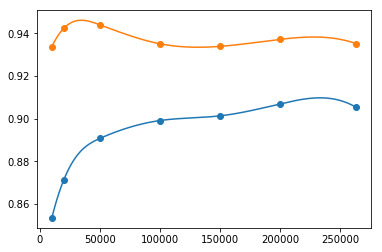

In [19]:
%matplotlib inline

import matplotlib as mpl
from scipy.interpolate import spline
#mpl.rcParams['text.usetex'] = False

def scores_attr_to_array(attr):
    return [getattr(point, attr) for point in tuned_model_heldout_score]

x = scores_attr_to_array('data_size')
y_heldout_acc_default = scores_attr_to_array('heldout_acc_default')
y_train_acc_default = scores_attr_to_array('training_acc_default')
y_heldout_acc_tuned = scores_attr_to_array('heldout_acc_tuned')

smooth_x = np.linspace(tuned_model_heldout_score[0].data_size, tuned_model_heldout_score[-1].data_size, 300)
smooth_heldout_acc_default = spline(x, y_heldout_acc_default, smooth_x)
smooth_train_acc_default = spline(x, y_train_acc_default, smooth_x)
smooth_heldout_acc_tuned = spline(x, y_heldout_acc_tuned, smooth_x)

plt.plot(
    smooth_x, smooth_heldout_acc_default,
    x, y_heldout_acc_default, 'o', color='C0'
)
plt.plot(
    smooth_x, smooth_train_acc_default,
    x, y_train_acc_default, 'o', color='C1'
)

#plt.plot(
#)
# plt.plot(
#     [point.data_size for point in tuned_model_heldout_score],
#     [1 - point.heldout_acc_default for point in tuned_model_heldout_score],
#     [point.data_size for point in tuned_model_heldout_score],
#     [1 - point.heldout_acc_tuned for point in tuned_model_heldout_score],
# )

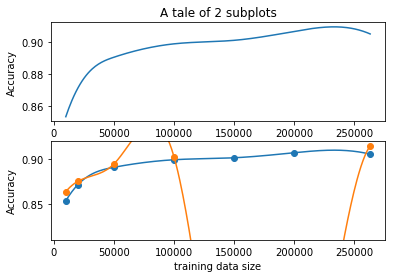

In [20]:
plt.subplot(2, 1, 1)
plt.plot(smooth_x, smooth_heldout_acc_default)
plt.title('A tale of 2 subplots')
plt.ylabel('Accuracy')

plt.subplot(2, 1, 2)
plt.plot(
    smooth_x, smooth_heldout_acc_default,
    x, y_heldout_acc_default, 'o', color='C0'
)
plt.plot(
    smooth_x, smooth_heldout_acc_tuned,
    x, y_heldout_acc_tuned, 'o', color='C1'
)

plt.xlabel('training data size')
plt.ylabel('Accuracy')
plt.ylim((0.81, 0.92))

plt.show()

In [95]:
TUNNING_SCORES_FILE_NAME = 'all_tunning_scores_export_from_ods.csv'
tuning_scores = pd.DataFrame.from_csv(os.path.join(CV_RESULTS_LOG_PATH, TUNNING_SCORES_FILE_NAME))
tuning_scores


,Depth-weight:3:1,Depth-weight:3:3,Depth-weight:3:5,Depth-weight:5:1,Depth-weight:5:3,Depth-weight:5:5,Depth-weight:7:1,Depth-weight:7:3,Depth-weight:7:5,Depth-weight:9:1,...,Csbt-ss:0.8:0.9,Csbt-ss:0.8:1,Csbt-ss:0.9:0.7,Csbt-ss:0.9:0.8,Csbt-ss:0.9:0.9,Csbt-ss:0.9:1,Csbt-ss:1:0.7,Csbt-ss:1:0.8,Csbt-ss:1:0.9,Csbt-ss:1:1
10 000,0.82810,0.82770,0.83100,0.8421,0.84170,0.84180,0.84580,0.84630,0.84500,0.84660,...,0.84830,0.8486,0.8471,0.84560,0.84810,0.84770,0.84540,0.84630,0.84660,0.84650
20 000,0.85530,0.85555,0.85390,0.8664,0.86490,0.86425,0.86840,0.86760,0.86755,0.86635,...,0.86980,0.8705,0.8674,0.86845,0.87060,0.87035,0.86835,0.87015,0.87085,0.86900
50 000,0.87504,0.87456,0.87432,0.8838,0.88348,0.88218,0.88758,0.88662,0.88550,0.88784,...,0.88822,0.8884,NaN,0.88722,0.88836,0.88776,NaN,0.88676,0.88934,0.88826


In [106]:
# odfiltrovani sloupcu s n/a
tuning_scores = tuning_scores[tuning_scores.columns[pd.isnull(tuning_scores).sum() == 0]]
tuning_scores.std(axis=1)


10 000    0.005832
20 000    0.004840
50 000    0.004322
dtype: float64

In [17]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
#mpl.use('pgf')

def figsize(scale):
    fig_width_pt = 469.755                          # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "font.size": 10,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "figure.figsize": figsize(0.9),     # default fig size of 0.9 textwidth
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    }
mpl.rcParams.update(pgf_with_latex)



# I make my own newfig and savefig functions
def newfig(width):
    plt.clf()
    fig = plt.figure(figsize=figsize(width))
    ax = fig.add_subplot(111)
    return fig, ax

def savefig(filename):
    plt.savefig('{}.pgf'.format(filename))
    plt.savefig('{}.pdf'.format(filename))


# Simple plot
fig, ax  = newfig(0.6)

def ema(y, a):
    s = []
    s.append(y[0])
    for t in range(1, len(y)):
        s.append(a * y[t] + (1-a) * s[t-1])
    return np.array(s)
    
y = [0]*200
y.extend([20]*(1000-len(y)))
s = ema(y, 0.01)

ax.plot(s)
ax.set_xlabel('X Label')
ax.set_ylabel('EMA')

#savefig('ema')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f1fe4078f28> (for post_execute):


RuntimeError: LaTeX was not able to process the following string:
b'lp'
Here is the full report generated by LaTeX: 



RuntimeError: LaTeX was not able to process the following string:
b'lp'
Here is the full report generated by LaTeX: 



In [13]:
print(np.array([0.90733, 0.912178, 0.914155, 0.909725, 0.910503]).mean())
print(np.array([0.907771, 0.912691, 0.913718, 0.909782, 0.910560]).mean())
print(np.array([float(f) for f in "0.909101 0.913433 0.914953 0.910276 0.911111".split()]).mean(), "(colsamp 0.9, subsamp 0.9)")
print(np.array([float(f) for f in "0.908493 0.913015 0.914592 0.909497 0.911111".split()]).mean(), "(colsamp 0.9, subsamp 0.8)")
print(np.array([float(f) for f in "0.908759 0.913110 0.915314 0.910219 0.910921".split()]).mean(), "(colsamp 0.8, subsamp 0.9)")
print(np.array([float(f) for f in "0.908569 0.913680 0.914668 0.909706 0.911377".split()]).mean(), "(colsamp 0.8, subsamp 0.8)")
print(np.array([float(f) for f in "0.906840 0.909879 0.912520 0.908661 0.908621".split()]).mean(), "(colsamp 1, subsamp 1)")


0.9107782
0.9109044
0.9117748 (colsamp 0.9, subsamp 0.9)
0.9113416 (colsamp 0.9, subsamp 0.8)
0.9116646 (colsamp 0.8, subsamp 0.9)
0.9116 (colsamp 0.8, subsamp 0.8)
0.9093042 (colsamp 1, subsamp 1)
